In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import hamming_loss, accuracy_score, jaccard_score

from sklearn.svm import SVC

In [2]:
df1 = pd.read_csv(r'C:\Users\avata\Desktop\New folder\ML\Class Activity 3\ObesityDataSet_raw_and_data_sinthetic.csv')

df = df1.copy()

In [3]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Step 1: Check the structure of the dataset. In this step you will also need to check for incorrect
and null values. Impute the missing values through mean for that column. Don’t focus on
outliers right now, just focus on making the data ready for EDA.

In [5]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True)

Step 2: EDA, for this you need to answer the following questions. Use the best visual for each of
the following questions.

1. Height and Weight Distribution

C:\Users\avata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\avata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


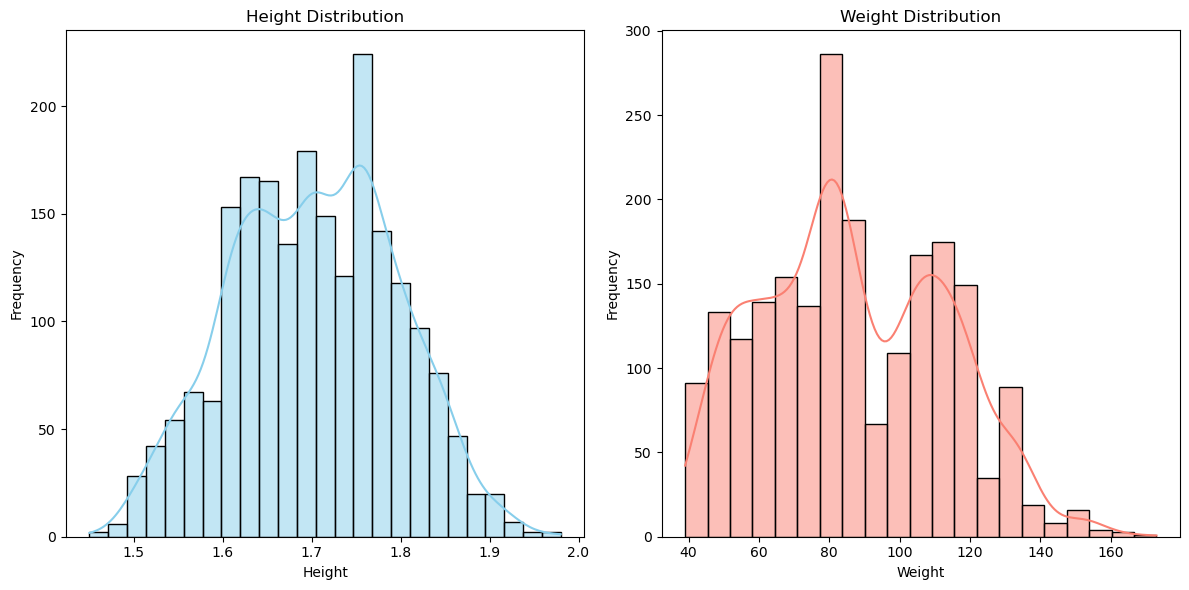

In [12]:
plt.figure(figsize=(12, 6))

# Distribution of Height
plt.subplot(1, 2, 1)
sns.histplot(df['Height'], kde=True, color='skyblue')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Distribution of Weight
plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], kde=True, color='salmon')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

2. Top 10 Ages with Highest Weight

In [14]:
# df.groupby('Age')['Weight'].mean().head(10)



Age
21.900120    165.057269
19.472190    160.935351
21.521294    160.639405
20.989016    155.872093
21.291969    155.242672
20.327723    154.618446
20.102241    153.959945
20.438478    153.149491
18.112503    152.720545
18.120739    152.567671
Name: Weight, dtype: float64


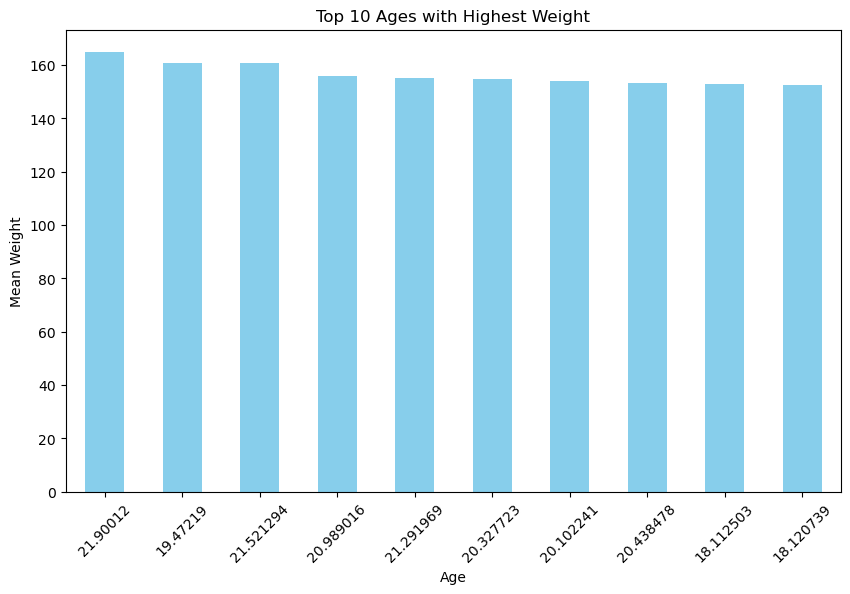

In [15]:
# Group by Age and calculate the mean weight for each age group
age_weight_mean = df.groupby('Age')['Weight'].mean()

# Sort the mean weights in descending order and select the top 10
top_10_ages = age_weight_mean.sort_values(ascending=False).head(10)

print(top_10_ages)

# Plotting the top 10 ages with highest weight
plt.figure(figsize=(10, 6))
top_10_ages.plot(kind='bar', color='skyblue')
plt.title('Top 10 Ages with Highest Weight')
plt.xlabel('Age')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45)
plt.show()


3. Distribution of CAEC values

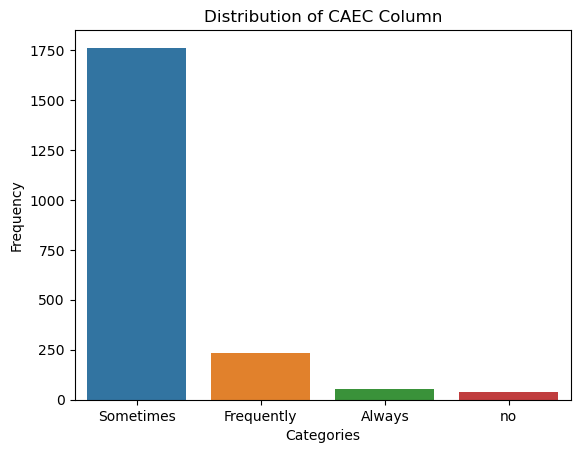

In [17]:
# Distribution of CAEC Values
sns.countplot(df, x='CAEC')
plt.title('Distribution of CAEC Column')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.show()

4. Average Ages with Family History with Overweight

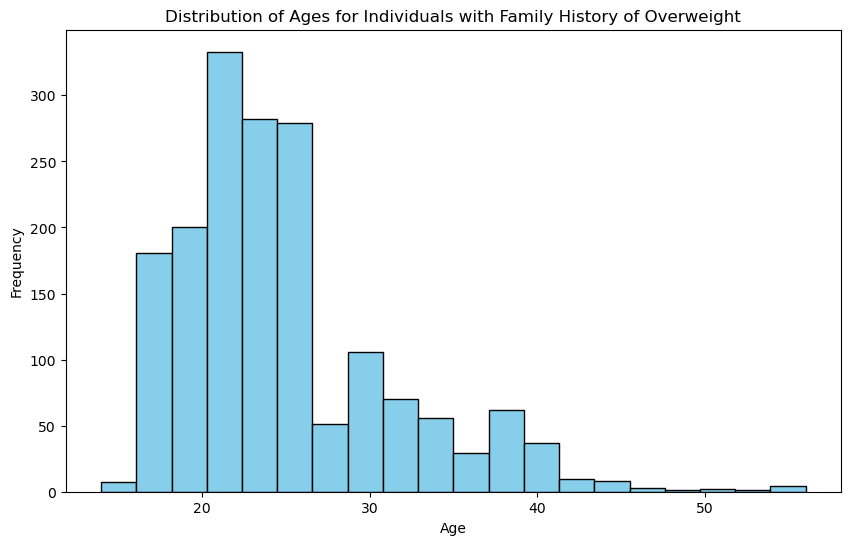

In [19]:
family_overweight = df[df['family_history_with_overweight'] == 'yes']
avg_family_overweight = family_overweight['Age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(family_overweight['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages for Individuals with Family History of Overweight')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

5. Correlation matrix

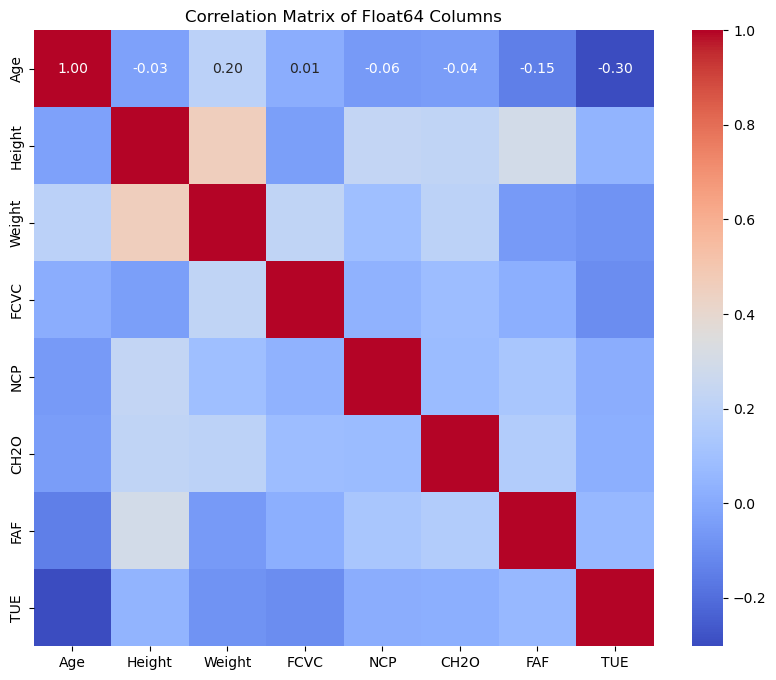

In [21]:
correlation_matrix = df.select_dtypes(include='float64').corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Float64 Columns')
plt.show()

Step 3: Data Preprocessing: Carefully, apply label encoding to categorical columns and
standard scalar to continuous columns. Apply one-hot encoding to only those columns which
need it. Split the data set after this, you can use any train test split.

In [23]:
X = df.drop(columns = ['NObeyesdad']).values
y = df['NObeyesdad'].values

In [24]:
label_encoder = LabelEncoder()

X[:, 1] = label_encoder.fit_transform(X[:, 1])
X[:, 5] = label_encoder.fit_transform(X[:, 5])
X[:, 8] = label_encoder.fit_transform(X[:, 8])
X[:, 9] = label_encoder.fit_transform(X[:, 9])
X[:, 11] = label_encoder.fit_transform(X[:, 11])
# y.reshape(-1, 1)
y = label_encoder.fit_transform(y)
y = y.reshape(-1, 1)
print(y)

[[1]
 [1]
 [1]
 ...
 [4]
 [4]
 [4]]


In [25]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [26]:
# Gender, FAVC, SCC, SMOKE, family_history_with_overweight

# CALC,CAEC,MTRANS

In [27]:
X[:, 4] = label_encoder.fit_transform(X[:, 4])
X[:, 14] = label_encoder.fit_transform(X[:, 14])
X[:, 15] = label_encoder.fit_transform(X[:, 15])

In [28]:
onehot_encoder = OneHotEncoder(categories='auto', sparse_output=False)
X_encoded = onehot_encoder.fit_transform(X[:, [4, 14, 15]])
print(X_encoded)
# Replace the original columns with the one-hot encoded columns
X = np.delete(X, [4, 14, 15], axis=1)
X = np.concatenate((X, X_encoded), axis=1)
print(X)

# y = onehot_encoder.fit_transform(y)

y = onehot_encoder.fit_transform(y)
print(y)

y.shape

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]
[[21.0 0 1.62 ... 0.0 1.0 0.0]
 [21.0 0 1.52 ... 0.0 1.0 0.0]
 [23.0 1 1.8 ... 0.0 1.0 0.0]
 ...
 [22.524036 0 1.752206 ... 0.0 1.0 0.0]
 [24.361936 0 1.73945 ... 0.0 1.0 0.0]
 [23.664709 0 1.738836 ... 0.0 1.0 0.0]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


(2087, 7)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)

In [30]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, 
                                   max_depth=6, min_samples_leaf=5)

In [31]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)

In [32]:
y_pred_en = clf_entropy.predict(X_test)

In [33]:
print(y_pred_en)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [34]:
print('Accuracy is:')
accuracy_score(y_test, y_pred_en)*100

Accuracy is:


88.75598086124403

In [35]:
y = df['NObeyesdad'].values
y = label_encoder.fit_transform(y)
#y = y.reshape(-1, 1)
print(y)
y.shape

[1 1 1 ... 4 4 4]


(2087,)

In [36]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size = 0.2, random_state = 200)

In [37]:
svm_classifier = SVC (kernel = 'rbf', random_state = 56, gamma = 'scale', C= 1.0)

In [38]:
svm_classifier.fit(X_train_svm, y_train_svm)

SVC(random_state=56)

In [39]:
y_pred_svm = svm_classifier.predict(X_test)

In [40]:
print('Accuracy is:')
accuracy_score(y_test_svm, y_pred_svm)*100

Accuracy is:


56.2200956937799